<h1>Book Contents</h1>
<li>Creation of 2D Integer-to-Integer 5/3 Lifting Wavelet transform</li>
<li>Perform Transform on a file (irrespective of format, HanQiu[2021] ) at level 2</li>

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def display_images_in_grid(ll, hl, lh, hh):
      
    fig, axs = plt.subplots(2, 2)

    # Display each image in its respective axis
    axs[0, 0].imshow(ll)
    axs[0, 1].imshow(hl)
    axs[1, 0].imshow(lh)
    axs[1, 1].imshow(hh)
    cv2.imshow('images', hh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    # Show the plot
    plt.show()




(768, 1024)


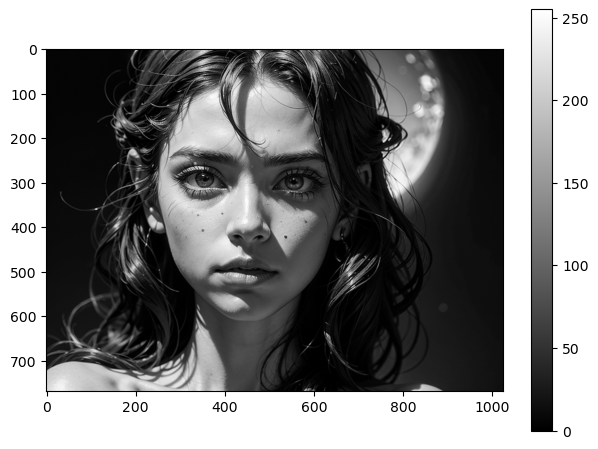

/tmp/ipykernel_11919/500733155.py:14: RuntimeWarning: overflow encountered in scalar add
  seq[(i << 1) - 1] -= (seq[(i - 1) << 1] + seq[i << 1]) >> 1
/tmp/ipykernel_11919/500733155.py:17: RuntimeWarning: overflow encountered in scalar add
  seq[0] += (seq[1] + seq[1] + 2) >> 2
/tmp/ipykernel_11919/500733155.py:19: RuntimeWarning: overflow encountered in scalar add
  seq[i << 1] += (seq[(i << 1) - 1] + seq[(i << 1) + 1] + 2) >> 2
/tmp/ipykernel_11919/500733155.py:20: RuntimeWarning: overflow encountered in scalar add
  seq[(approx_len - 1) << 1] += (seq[(approx_len << 1) - 3] + seq[(detail_len << 1) - 1] + 2) >> 2
/tmp/ipykernel_11919/500733155.py:15: RuntimeWarning: overflow encountered in scalar add
  seq[(detail_len << 1) - 1] -= (seq[(detail_len - 1) << 1] + seq[(approx_len - 1) << 1]) >> 1
QObject::moveToThread: Current thread (0x2e00c90) is not the object's thread (0x3571b90).
Cannot move to target thread (0x2e00c90)

QObject::moveToThread: Current thread (0x2e00c90) is not the o

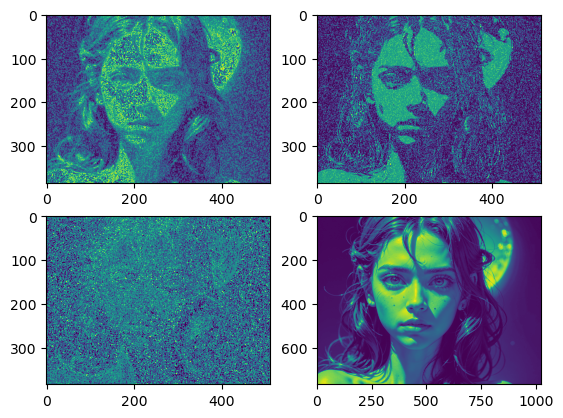

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def dwt(seq):
    seq = np.copy(seq)
    n = seq.shape[0]

    detail_len = n >> 1
    approx_len = n - detail_len

    for i in range(1, detail_len):
        seq[(i << 1) - 1] -= (seq[(i - 1) << 1] + seq[i << 1]) >> 1
    seq[(detail_len << 1) - 1] -= (seq[(detail_len - 1) << 1] + seq[(approx_len - 1) << 1]) >> 1

    seq[0] += (seq[1] + seq[1] + 2) >> 2
    for i in range(1, approx_len - 1):
        seq[i << 1] += (seq[(i << 1) - 1] + seq[(i << 1) + 1] + 2) >> 2
    seq[(approx_len - 1) << 1] += (seq[(approx_len << 1) - 3] + seq[(detail_len << 1) - 1] + 2) >> 2

    return seq

def idwt(seq):
    seq = np.copy(seq)
    n = seq.shape[0]

    detail_len = n >> 1
    approx_len = n - detail_len
    
    seq[0] -= (seq[1] + seq[1] + 2) >> 2
    for i in range(1, approx_len - 1):
        seq[i << 1] -= (seq[(i << 1) - 1] + seq[(i << 1) + 1] + 2) >> 2
    seq[(approx_len - 1) << 1] -= (seq[(approx_len << 1) - 3] + seq[(detail_len << 1) - 1] + 2) >> 2

    for i in range(1, detail_len):
        seq[(i << 1) - 1] += (seq[(i - 1) << 1] + seq[i << 1]) >> 1
    seq[(detail_len << 1) - 1] += (seq[(detail_len - 1) << 1] + seq[(approx_len - 1) << 1]) >> 1

    return seq


def dwt2d(seq):
    
    horizontal_transform = np.apply_along_axis(dwt, axis=1, arr=seq)
    l = horizontal_transform[:,::2]
    h = horizontal_transform[:,1::2]
      
    vertical_transform_l = np.apply_along_axis(dwt, axis=0, arr=l)
    ll = np.array(vertical_transform_l[::2,:])
    lh = np.array(vertical_transform_l[1::2,:])
    
    vertical_transform_h = np.apply_along_axis(dwt, axis=0, arr=h)
    hl = np.array(vertical_transform_h[::2,:])    
    hh = np.array(vertical_transform_h[1::2,:])
    
    return ll, hl, lh, hh

def idwt2d(seq):
    None
    
def test():
    # seq = np.random.randint(0, 255 + 1, size=(8, 8))
    # print(f'original: \n{seq}\n')
    img = cv2.imread('data/images/girl_dress.jpg', cv2.IMREAD_GRAYSCALE)
    print(img.shape)
    plt.imshow(img, cmap='gray', vmin=np.min(img), vmax=np.max(img)) 
    plt.tight_layout()
    plt.colorbar()  # Show colorbar for intensity scale
    plt.show()  # Display the image
    # print(dwt2d(img))
    ll, hl, lh, hh = dwt2d(img)
    display_images_in_grid(ll, hl, hh, img)
test()

In [34]:
import numpy as np

# Create the original array
original_array = np.array([
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [8, 9, 10, 11],
    [12, 13, 14, 15]
])

# Function to perform a transformation on a column
def transform_column(column_data):
    # Example transformation: square each element
    print(column_data)
    return column_data*2

# Initialize arrays for even and odd index rows
even_indexed_rows = []
odd_indexed_rows = []

# Iterate over each column
for col_idx in range(original_array.shape[1]):
    column_data = original_array[:, col_idx]
    
    # Transform the column data
    transformed_data = transform_column(column_data)
    
    # Append even and odd index rows to respective arrays
    for row_idx, value in enumerate(transformed_data):
        if row_idx % 2 == 0:
            even_indexed_rows.append(value)
        else:
            odd_indexed_rows.append(value)

# Convert lists to arrays
even_indexed_rows = np.array(even_indexed_rows)
odd_indexed_rows = np.array(odd_indexed_rows)

# Reshape arrays to match the original array shape
even_indexed_rows = even_indexed_rows.reshape(-1, original_array.shape[1])
odd_indexed_rows = odd_indexed_rows.reshape(-1, original_array.shape[1])

# Display the transformed arrays
print("Transformed Even-Indexed Rows:")
print(even_indexed_rows)
print("\nTransformed Odd-Indexed Rows:")
print(odd_indexed_rows)


[ 0  4  8 12]
[ 1  5  9 13]
[ 2  6 10 14]
[ 3  7 11 15]
Transformed Even-Indexed Rows:
[[ 0 16  2 18]
 [ 4 20  6 22]]

Transformed Odd-Indexed Rows:
[[ 8 24 10 26]
 [12 28 14 30]]


In [35]:
original_array = np.array([
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [8, 9, 10, 11],
    [12, 13, 14, 15]
])

transform = dwt(original_array)
print(transform)

transform_2 = np.apply_along_axis(dwt, axis=1, arr=original_array)
print(transform_2)

p = []
for row in original_array:
    transform = dwt(row)
    p.append(transform)
        
p = np.array(p)
print(p)

transform_3 = np.apply_along_axis(transform_column, axis=0, arr=transform_2)
print(transform_3)

[[ 0  1  2  3]
 [ 0  0  0  0]
 [ 9 10 11 12]
 [ 4  4  4  4]]
[[ 0  0  2  1]
 [ 4  0  6  1]
 [ 8  0 10  1]
 [12  0 14  1]]
[[ 0  0  2  1]
 [ 4  0  6  1]
 [ 8  0 10  1]
 [12  0 14  1]]
[ 0  4  8 12]
[0 0 0 0]
[ 2  6 10 14]
[1 1 1 1]
[[ 0  0  4  2]
 [ 8  0 12  2]
 [16  0 20  2]
 [24  0 28  2]]
